# Related Issues

## [Research Request - Transit Agency Peer Groups subtask: NTD Characteristics #1442](https://github.com/cal-itp/data-analyses/issues/1442)


## via Juan Matute  email 5/29/2025
In a more advanced version, operators would be clustered into groups of 10 or more based on: 

- mode of service, 
- vehicles available, 
- population density of service territory, 
- job density of service territory, and, perhaps, 
- service area overlap with other transit operators (a GTFS spatial analysis exercise).  

An agency scoring in the bottom 1 or 2 of the cluster would get some remedial help in their triennial audit.Or face consolidation (FWIW, I like the BC Transit model for consolidation starting in 1979).  

Several large transit operators, especially those operating rail, wouldn't be candidates for consolidation and wouldn't fit this clustering method and would instead rely on a triennial audit, where I would expect trends over time for GTFS-RT quality, customer experience metrics (Transit App surveys or mystery shops) and several of these metrics to be considered holistically.  

And perhaps agency costs would be adjusted for regional consumer price index maintained by California Department of Industrial Relations.  Either that or they'd just be clustered with regional peers.


## [Transit Agency Peer Groups literature review #1562](https://github.com/cal-itp/data-analyses/issues/1562)

Link to literature document (requires sharepoint): https://caltrans.sharepoint.com/:w:/r/sites/DOTPMPHQ-DDSContractors/_layouts/15/Doc.aspx?sourcedoc=%7B61CE5D08-BDAC-4947-ADE3-59CA472CF679%7D&file=transit_peer_groups_lit_review.docx&action=default&mobileredirect=true

## [Exploratory clustering analysis with NTD data #1580](https://github.com/cal-itp/data-analyses/issues/1580)

This notebook

## [IBM Definition of Hierarchial Clustering](https://www.ibm.com/think/topics/hierarchical-clustering)
>There are two types of hierarchical clustering:
>- `Agglomerative` or bottom-up approach1 that repeatedly merges clusters into larger ones until a single cluster emerges.
>- `Divisive` or top-down approach that2 starts with all data in a single cluster and continues to split out successive clusters until all clusters are singletons.

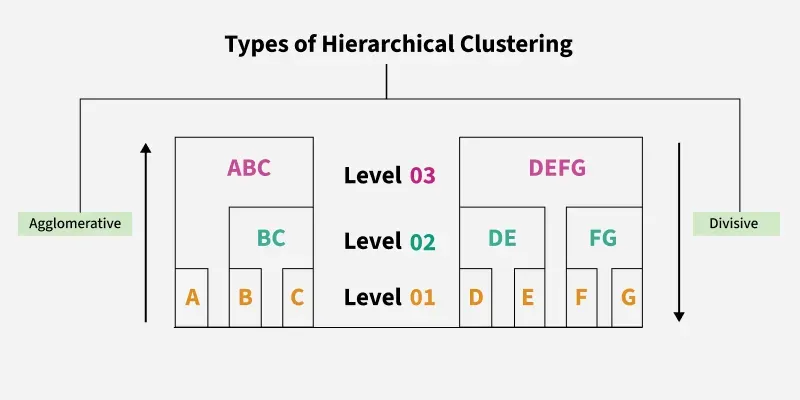

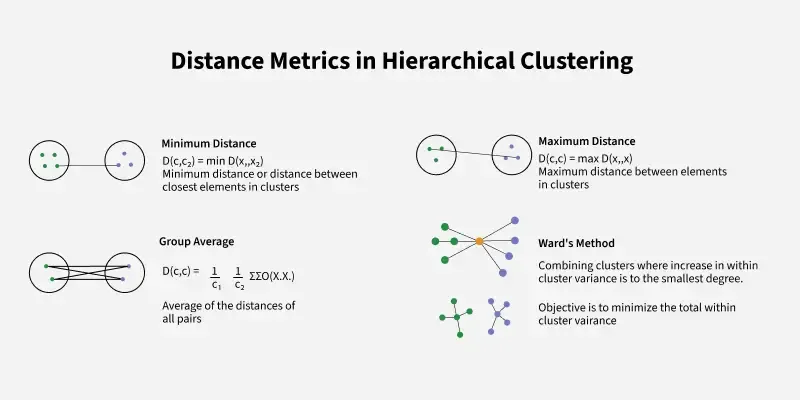

## Scikit-Learns References
- [2.3 Clustering](https://scikit-learn.org/stable/modules/clustering.html)
- [2.3.6 Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering). Explains to use the `AgglomerativeClustering` object with `linkage ="ward"`

Ward:
>Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach. 

In [1]:
# scikit learns imports for clustering
from sklearn.cluster import AgglomerativeClustering # has linage arg for "ward"
import pandas as pd

In [4]:
# new imports to query warehouse using SQLAlchemy
#from calitp_data_analysis.tables import tbls
from calitp_data_analysis.sql import get_engine

db_engine = get_engine()

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## example syntax for new query method
```
with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_opexp_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_opexp_total
        WHERE state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND opexp_total IS NOT NULL
    """
    op_total = pd.read_sql(query, connection, params={'uza_match': '%, CA%', 'years': year_list})

op_total.info()
```

## Test Query
query NTD data from `mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode...`. Same data used for the transit performance metrics

In [5]:
year_list = [2018, 2019, 2020, 2021, 2022, 2023]

fct_service_base_columns = [
    'source_agency',
    'agency_status',
    'source_city',
    'mode',
    'service',
    'ntd_id',
    'reporter_type',
    'reporting_module',
    'source_state',
    'primary_uza_name',
    'year',
    "uza_area_sq_miles",
    "uza_population"   
]

In [6]:
time_series_by_mode_opexp_columns = fct_service_base_columns + ['opexp_total']

with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_opexp_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_opexp_total
        WHERE state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND opexp_total IS NOT NULL
    """
    op_total = pd.read_sql(query, connection, params={'uza_match': '%, CA%', 'years': year_list})



In [7]:
time_series_by_mode_upt_columns = fct_service_base_columns + ['upt']
# mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_upt

with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_upt_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_upt
        WHERE source_state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND upt IS NOT NULL
    """
    mode_upt = pd.read_sql(query, connection, params={'uza_match': '%, CA%', 'years': year_list})


In [8]:
time_series_by_mode_vrh_columns = fct_service_base_columns + ['vrh']
# mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrh

with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_vrh_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrh
        WHERE source_state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND vrh IS NOT NULL
    """
    mode_vrh = pd.read_sql(query, connection, params={'uza_match': '%, CA%', 'years': year_list})



In [9]:
time_series_by_mode_vrm_columns = fct_service_base_columns + ['vrm']
# mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrm

with db_engine.connect() as connection:
    query = f"""
        SELECT {','.join(time_series_by_mode_vrm_columns)}
        FROM cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrm
        WHERE source_state = 'CA'
         AND primary_uza_name LIKE %(uza_match)s
         AND year IN UNNEST(%(years)s)
         AND vrm IS NOT NULL
    """
    mode_vrm = pd.read_sql(query, connection, params={'uza_match': '%, CA%', 'years': year_list})



### confirming all queries work

In [ ]:
df_list = [
    op_total,
    mode_upt,
    mode_vrh,
    mode_vrm
    ]

for df in df_list:
    print(
        f"""Columns:{df.columns},
        Shape:{df.shape} 
        """
    )

## Test combining all queries

In [10]:
time_series_by_mode_opexp_columns

['source_agency',
 'agency_status',
 'source_city',
 'mode',
 'service',
 'ntd_id',
 'reporter_type',
 'reporting_module',
 'source_state',
 'primary_uza_name',
 'year',
 'uza_area_sq_miles',
 'uza_population',
 'opexp_total']

In [11]:
", ".join([f"op_total.{col}" for col in time_series_by_mode_opexp_columns])

'op_total.source_agency, op_total.agency_status, op_total.source_city, op_total.mode, op_total.service, op_total.ntd_id, op_total.reporter_type, op_total.reporting_module, op_total.source_state, op_total.primary_uza_name, op_total.year, op_total.uza_area_sq_miles, op_total.uza_population, op_total.opexp_total'

In [16]:
with db_engine.connect() as connection:
    all_query = f"""
        SELECT DISTINCT
            {", ".join([f"op_total.{col}" for col in time_series_by_mode_opexp_columns])},
            mode_upt.upt,
            mode_vrh.vrh,
            mode_vrm.vrm,
        FROM
          cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_opexp_total AS op_total
        JOIN
          cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_upt AS mode_upt
        ON
          op_total.ntd_id = mode_upt.ntd_id
          AND mode_upt.source_state = 'CA'
          AND mode_upt.year = 2023
          AND mode_upt.upt IS NOT NULL
        JOIN
          cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrh AS mode_vrh
        ON
          op_total.ntd_id = mode_vrh.ntd_id
          AND mode_vrh.source_state = 'CA'
          AND mode_vrh.year = 2023
          AND mode_vrh.vrh IS NOT NULL
        JOIN
          cal-itp-data-infra.mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_vrm AS mode_vrm
        ON
          op_total.ntd_id = mode_vrm.ntd_id
          AND mode_vrm.source_state = 'CA'
          AND mode_vrm.year = 2023
          AND mode_vrm.vrm IS NOT NULL
        WHERE
          op_total.source_state = "CA"
          AND op_total.year = 2023
          AND op_total.opexp_total IS NOT NULL
        LIMIT 1000

    """
    test_q = pd.read_sql(all_query, connection)

In [17]:
test_q.info()
# need to group by to get the distinct agencies down 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source_agency      1000 non-null   object 
 1   agency_status      1000 non-null   object 
 2   source_city        1000 non-null   object 
 3   mode               1000 non-null   object 
 4   service            1000 non-null   object 
 5   ntd_id             1000 non-null   object 
 6   reporter_type      1000 non-null   object 
 7   reporting_module   1000 non-null   object 
 8   source_state       1000 non-null   object 
 9   primary_uza_name   1000 non-null   object 
 10  year               1000 non-null   int64  
 11  uza_area_sq_miles  1000 non-null   float64
 12  uza_population     1000 non-null   int64  
 13  opexp_total        1000 non-null   int64  
 14  upt                1000 non-null   int64  
 15  vrh                1000 non-null   int64  
 16  vrm                1000 n

In [20]:
test_q["source_agency"].value_counts()

Alameda-Contra Costa Transit District                              625
Amador Transit (AT)                                                 81
Antelope Valley Transit Authority (AVTA)                            81
Central Contra Costa Transit Authority (CCCTA)                      81
City and County of San Francisco (SFMTA) - Transit Division         57
Access Services (AS)                                                16
Anaheim Transportation Network (ATN)                                16
Butte County Association of Governments (BCAG)                      16
Calaveras Transit Agency (CTA)                                      16
Blue Lake Rancheria (BLRTS) - Transportation                         8
Altamont Corridor Express (ACE)                                      1
California Vanpool Authority (CVA)                                   1
Chemehuevi Indian Tribe (CTA) - Reality and Planning department      1
Name: source_agency, dtype: int64

## Reading in cleaned data from `transit_performance_metrics`
this merged data from `mart_ntd_funding_and_expenses.fct_service_data_and_operating_expenses_time_series_by_mode_..` tables

In [13]:
df = pd.read_parquet(f"gs://calitp-analytics-data/data-analyses/ntd/raw_transit_performance_metrics_data.parquet")

In [23]:
display(
    df[df["year"]== "2023"].info(),
    df.describe(),
    df["year"].value_counts()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 190 to 2089
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   agency_name       338 non-null    object  
 1   agency_status     338 non-null    object  
 2   city              338 non-null    object  
 3   mode              338 non-null    object  
 4   service           338 non-null    object  
 5   ntd_id            338 non-null    object  
 6   reporter_type     338 non-null    object  
 7   reporting_module  338 non-null    object  
 8   state             338 non-null    object  
 9   primary_uza_name  338 non-null    object  
 10  year              338 non-null    object  
 11  upt               338 non-null    int64   
 12  vrh               338 non-null    int64   
 13  vrm               338 non-null    int64   
 14  opexp_total       338 non-null    int64   
 15  RTPA              338 non-null    object  
 16  _merge            338 n

None

,upt,vrh,vrm,opexp_total
count,2.091000e+03,2.091000e+03,2.091000e+03,2.091000e+03
mean,2.660662e+06,1.161680e+05,1.754771e+06,2.223394e+07
std,1.405787e+07,3.934805e+05,5.856907e+06,8.622174e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.887900e+04,5.847500e+03,6.586950e+04,5.853455e+05
50%,7.961300e+04,1.750400e+04,2.583970e+05,1.841343e+06
75%,5.417190e+05,6.606900e+04,1.021278e+06,8.832687e+06
max,2.609022e+08,6.341989e+06,8.378382e+07,1.355086e+09


2019    358
2020    355
2018    348
2021    347
2022    345
2023    338
Name: year, dtype: int64

In [ ]:
df[df["city"].str.contains("Sacramento")]["agency_name"].unique()

## Testing `AgglomerativeClustering`

In [ ]:
# encode categorical and numerical columns?

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# StandardScaler normalize numeric vales (z-score standardization) for each column
# OneHotEncoder turns categorical column into binary columns for each variable (mode_rail, mode_bus, mode_ferry), and assigns 0 or 1.
# Column Transformer to be to use both methods in a pipeline

In [26]:
model = AgglomerativeClustering(n_clusters=5, linkage="ward")

In [27]:
clustered = model.fit_predict(df)

ValueError: could not convert string to float: 'City of Porterville (COLT) - Transit Department'